In [31]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import re
from typing import Callable
import seaborn as sns

In [32]:
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')  # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'})  # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [33]:
house = pd.read_csv('../02_data_process/house_select.csv')

In [34]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in house.columns:
    if pd.api.types.is_numeric_dtype(house[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적', '계약년월', '계약일', '층', '건축년도', 'target', 'is_test', '경도', '위도', '1_bus', '3_bus', '5_bus', '10_bus', '1_sub', '3_sub', '5_sub', '10_sub', '1_school', '3_school', '5_school', '10_school', '계약연도', '계약월', 'bus_access_score', 'sub_access_score', 'school_access_score', '아파트_최고층', '층_최고층대비비율', '구_해당달_거래수', '동_해당달_거래수', '구_직전달까지누적거래수', '동_직전달까지누적거래수', '동대구_해당달_비율', '동대구_직전누적_비율', '연식', '강남여부', '브랜드']
범주형 변수: ['아파트명', '도로명', '주소', '구', '동', '층구간_상대', '연식_bin']


In [35]:
# 범주형 변수에 대한 보간
house[categorical_columns] = house[categorical_columns].fillna('NULL')

In [36]:
house.isnull().sum()

본번                       75
부번                       75
아파트명                      0
전용면적                      0
계약년월                      0
계약일                       0
층                         0
건축년도                      0
도로명                       0
target                 9272
is_test                   0
주소                        0
경도                        0
위도                        0
1_bus                     0
3_bus                     0
5_bus                     0
10_bus                    0
1_sub                     0
3_sub                     0
5_sub                     0
10_sub                    0
1_school                  0
3_school                  0
5_school                  0
10_school                 0
계약연도                      0
계약월                       0
bus_access_score          0
sub_access_score          0
school_access_score       0
구                         0
동                         0
아파트_최고층                  10
층_최고층대비비율                10
층구간_상대              

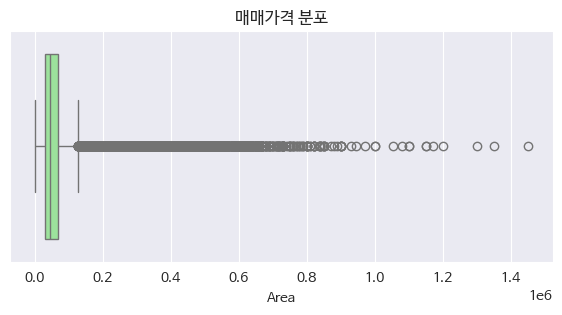

In [37]:
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = house, x = 'target', color='lightgreen')
plt.title('매매가격 분포')
plt.xlabel('Area')
plt.show()


In [38]:
# IQR 기준으로 '전용면적' 이상치 값 확인
col = 'target'
s = house[col].dropna()

q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask_outlier = (house[col] < lower) | (house[col] > upper)
out_vals = house.loc[mask_outlier, col]

print(f"[IQR 기준 임계값] lower={lower:.3f}, upper={upper:.3f}")
print(f"[이상치 개수] {mask_outlier.sum()} / {len(house)} (비율 {mask_outlier.mean():.2%})")

# 이상치 값들(중복 제거) 정렬
uniq_vals = np.sort(out_vals.unique())

# 너무 많을 수 있으니 하위/상위 일부만 미리보기
n_show = 20
print("\n[하위 쪽 이상치 값 미리보기]")
print(uniq_vals[:n_show])

print("\n[상위 쪽 이상치 값 미리보기]")
print(uniq_vals[-n_show:])

# 빈도 상위 값 확인(어떤 값들이 자주 등장하는지)
print("\n[이상치 값 상위 빈도]")
print(out_vals.value_counts().head(15))

# 이상치 행 몇 개 확인(필요 시 다른 컬럼도 함께 보세요)
print("\n[이상치 행 미리보기]")
display(house.loc[mask_outlier].sort_values(col).head(10))

[IQR 기준 임계값] lower=-28600.000, upper=129000.000
[이상치 개수] 74606 / 1125968 (비율 6.63%)

[하위 쪽 이상치 값 미리보기]
[129099. 129100. 129152. 129200. 129250. 129300. 129400. 129453. 129491.
 129500. 129530. 129550. 129600. 129700. 129750. 129752. 129800. 129863.
 129900. 129920.]

[상위 쪽 이상치 값 미리보기]
[ 840000.  845000.  850000.  870000.  880000.  890000.  900000.  929070.
  945000.  970000. 1000000. 1053000. 1080000. 1100000. 1150000. 1170000.
 1200000. 1300000. 1350000. 1450000.]

[이상치 값 상위 빈도]
target
130000.0    2634
140000.0    2217
150000.0    1856
135000.0    1798
160000.0    1512
145000.0    1491
170000.0    1302
155000.0    1173
180000.0    1112
165000.0    1073
138000.0     939
200000.0     938
175000.0     889
190000.0     871
133000.0     827
Name: count, dtype: int64

[이상치 행 미리보기]


,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,target,...,구_해당달_거래수,동_해당달_거래수,구_직전달까지누적거래수,동_직전달까지누적거래수,동대구_해당달_비율,동대구_직전누적_비율,연식,연식_bin,강남여부,브랜드
813809,799.0,5.0,힐스나인빌리지,159.8700,201404,26,4,2012,방배로32길 103-8,129099.0,...,261,61,8514,91,0.233716,0.010688,2,신축_5년,1,True
429760,101.0,1.0,우성,80.3900,201904,27,12,1981,올림픽로4길 42,129100.0,...,284,73,32544,8708,0.257042,0.267576,38,노후_20년초과,1,False
85704,404.0,0.0,한가람,59.8800,201809,18,8,1998,이촌로65가길 23,129100.0,...,107,24,29158,640,0.224299,0.021949,20,중고_20년,0,False
214606,385.0,0.0,DMC파크뷰자이1단지,84.9800,202304,3,19,2015,가재울미래로 2,129100.0,...,119,29,36896,6921,0.243697,0.187581,8,준신축_10년,0,True
242309,513.0,0.0,고덕센트럴IPARK,59.9900,202104,13,3,2019,고덕로80길 99,129152.0,...,159,7,20996,288,0.044025,0.013717,2,신축_5년,1,False
296199,658.0,0.0,로데오현대,90.9400,201912,16,3,1998,압구정로50길 28,129200.0,...,375,3,47417,1594,0.008000,0.033617,21,노후_20년초과,1,False
345559,531.0,0.0,힐스테이트 상도 센트럴파크,84.7835,202007,4,15,2012,상도로 346-1,129200.0,...,512,142,63308,232,0.277344,0.003665,8,준신축_10년,1,True
345556,531.0,0.0,힐스테이트 상도 센트럴파크,84.7835,202007,4,15,2012,상도로 346-1,129200.0,...,512,142,63308,232,0.277344,0.003665,8,준신축_10년,1,True
505551,1332.0,13.0,래미안서초에스티지,83.6000,201701,4,15,2016,서운로 107,129200.0,...,177,59,74408,1123,0.333333,0.015092,1,신축_5년,1,True
366314,176.0,0.0,삼환,121.0400,202002,21,7,1984,오금로 432,129200.0,...,363,33,46055,8776,0.090909,0.190555,36,노후_20년초과,1,False


In [39]:
region_col = '구'          # 지역
area_col   = '전용면적'     # 면적
target_col = 'target'      # 타깃

df = house.copy()

# 분리
df_train = df[df['is_test'] == 0].copy()
df_test  = df[df['is_test'] == 1].copy()

# 1) 타깃 로그 변환(Train만)
df_train['target_log'] = np.log1p(df_train[target_col])

# 2) 지역 내 면적 분위수 기반 버킷 경계(Train에서만) 생성 → 전체에 적용
n_bins = 10  # 표본 적으면 5로 조정 권장
quant_grid = np.linspace(0.0, 1.0, n_bins + 1)

# 지역별 면적 분위수 경계 사전: {region: np.ndarray(edges)}
edges_by_region = {}
global_edges = np.quantile(df_train[area_col].values, quant_grid)
global_edges = np.unique(global_edges)  # 중복 제거(동일값 다수일 때 대비)

for region, g in df_train.groupby(region_col, observed=True, dropna=False):
    edges = np.quantile(g[area_col].values, quant_grid) if len(g) > 0 else global_edges
    edges = np.unique(edges)
    # 유효한 경계가 최소 2개 미만이면 글로벌 경계 사용
    if edges.size < 2:
        edges = global_edges
    edges_by_region[region] = edges

def assign_area_bin(row):
    region = row[region_col]
    val = row[area_col]
    edges = edges_by_region.get(region, global_edges)
    # pd.cut은 경계가 2개 이상 필요
    if edges.size < 2 or pd.isna(val):
        return pd.NA
    try:
        return pd.cut([val], bins=edges, labels=False, include_lowest=True)[0]
    except Exception:
        # 값이 경계를 벗어나거나, 경계 중복 등 문제 시 약간의 확장으로 재시도
        span = edges[-1] - edges[0] if edges.size >= 2 else 1.0
        eps = span * 1e-6 if span > 0 else 1e-6
        edges_safe = edges.copy()
        edges_safe[0]  = edges_safe[0] - eps
        edges_safe[-1] = edges_safe[-1] + eps
        try:
            return pd.cut([val], bins=edges_safe, labels=False, include_lowest=True)[0]
        except Exception:
            return pd.NA

df['area_bin_in_region'] = df.apply(assign_area_bin, axis=1).astype('Int64')

# 3) 로그 스케일에서 지역×면적버킷별 하/상위 분위수 계산(Train만)
low_q, up_q = 0.005, 0.995  # 0.5% ~ 99.5%
grp = (
    df_train
    .merge(df[['area_bin_in_region']], left_index=True, right_index=True)
    .groupby([region_col, 'area_bin_in_region'], observed=True, dropna=False)['target_log']
)
q_df = grp.quantile([low_q, up_q]).unstack(level=-1)
q_df.columns = ['log_low', 'log_up']

# 4) 각 행에 임계값 매핑 + 결측(표본 부족 그룹)은 Train 전역 분위수로 보완
df_all = df.copy()
df_all = df_all.merge(q_df, left_on=[region_col, 'area_bin_in_region'], right_index=True, how='left')

global_low = df_train['target_log'].quantile(low_q)
global_up  = df_train['target_log'].quantile(up_q)
df_all['log_low'] = df_all['log_low'].fillna(global_low)
df_all['log_up']  = df_all['log_up'].fillna(global_up)

# 5) 클리핑(윈저라이징) - Train만 적용
df_all['target_log'] = np.where(df_all['is_test'] == 0, np.log1p(df_all[target_col]), np.nan)
df_all['target_log_clip'] = df_all['target_log']  # 기본값

mask_train = df_all['is_test'] == 0
df_all.loc[mask_train, 'target_log_clip'] = df_all.loc[mask_train, 'target_log'].clip(
    lower=df_all.loc[mask_train, 'log_low'],
    upper=df_all.loc[mask_train, 'log_up']
)
df_all['target_clip'] = np.expm1(df_all['target_log_clip'])

# 6) 모니터링(Train 기준)
clipped_low  = (df_all['target_log'] < df_all['log_low']) & mask_train
clipped_high = (df_all['target_log'] > df_all['log_up']) & mask_train
clipped_any  = clipped_low | clipped_high
print(f"[클리핑 비율 - Train] 전체={clipped_any.mean():.2%} / 하위={clipped_low.mean():.2%} / 상위={clipped_high.mean():.2%}")

# 7) 결과를 원본 house에 반영
house['area_bin_in_region'] = df_all['area_bin_in_region'].values
# Train만 존재하는 타깃 파생치
house.loc[mask_train, 'target_log_clip'] = df_all.loc[mask_train, 'target_log_clip'].values
house.loc[mask_train, 'target_clip']     = df_all.loc[mask_train, 'target_clip'].values

[클리핑 비율 - Train] 전체=0.97% / 하위=0.48% / 상위=0.49%


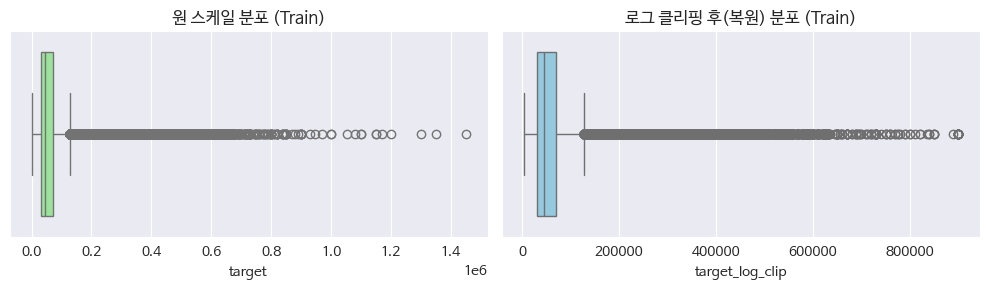

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(x=df_train[target_col], color='lightgreen', ax=axes[0])
axes[0].set_title('원 스케일 분포 (Train)')

sns.boxplot(x=np.expm1(df_all.loc[mask_train, 'target_log_clip']), color='skyblue', ax=axes[1])
axes[1].set_title('로그 클리핑 후(복원) 분포 (Train)')
plt.tight_layout()
plt.show()

# 튜닝 필요 시
# - 상단 꼬리가 여전히 길어 모델이 고가 추정에 어려움이 있으면 상한 분위수를 조금 더 낮춰보세요.
#     - 예: 0.5–99.0% 또는 1.0–99.0%
#
# - 반대로 고가 구간 예측력이 떨어진다면 상한을 살짝 완화.
#     - 예: 0.25–99.75% (표본이 충분한 그룹에 한해)


In [47]:
# house.columns 기반으로 feature 컬럼 자동 선택(타깃 관련은 제외)
exclude_target_cols = ['target_log_clip', 'target_clip', 'target']
feature_cols = [c for c in house.columns if c not in exclude_target_cols]

# Train/Test 분리 후 저장: Train에는 target_log_clip만 포함
train_out = house[house['is_test'] == 0][feature_cols + ['target_log_clip']]
test_out  = house[house['is_test'] == 1][feature_cols]

train_out.to_csv('train_processed.csv', index=False)
test_out.to_csv('test_processed.csv', index=False)
print('Saved: train_processed.csv, test_processed.csv')


Saved: train_processed.csv, test_processed.csv
